# Import Files

In [218]:
import numpy as np
import pandas as pd
import librosa as lb
import librosa.display as lbd
import tensorflow as tf
import os
import pathlib
from keras.utils import to_categorical
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Import Dataset

In [219]:
if os.path.isdir("audio"):
    audio_dataset = pathlib.Path('audio')
    # Create list of all audio files for tensorflow
    audio_wav = tf.io.gfile.glob(str(audio_dataset) + '/*')
else:
    exit("No audio dataset folder found")

print(audio_wav)

['audio\\BF001_1PT.wav', 'audio\\BF001_2NL.wav', 'audio\\BF001_3NT.wav', 'audio\\BF001_4PL.wav', 'audio\\BF002_1PT.wav', 'audio\\BF002_2NL.wav', 'audio\\BF002_3NT.wav', 'audio\\BF002_4PL.wav', 'audio\\BF003_1PT.wav', 'audio\\BF003_2NL.wav', 'audio\\BF003_3NT.wav', 'audio\\BF003_4PL.wav', 'audio\\BF004_1PT.wav', 'audio\\BF004_2NL.wav', 'audio\\BF004_3NT.wav', 'audio\\BF004_4PL.wav', 'audio\\BF006_1PT.wav', 'audio\\BF006_2NL.wav', 'audio\\BF006_3NT.wav', 'audio\\BF006_4PL.wav', 'audio\\BF008_1PT.wav', 'audio\\BF008_2NL.wav', 'audio\\BF008_3NT.wav', 'audio\\BF008_4PL.wav', 'audio\\BF013_1PT.wav', 'audio\\BF013_2NL.wav', 'audio\\BF013_3NT.wav', 'audio\\BF013_4PL.wav', 'audio\\BF014_1PT.wav', 'audio\\BF014_2NL.wav', 'audio\\BF014_3NT.wav', 'audio\\BF014_4PL.wav', 'audio\\BF015_1PT.wav', 'audio\\BF015_2NL.wav', 'audio\\BF015_3NT.wav', 'audio\\BF015_4PL.wav', 'audio\\BF016_1PT.wav', 'audio\\BF016_2NL.wav', 'audio\\BF016_3NT.wav', 'audio\\BF016_4PL.wav', 'audio\\BF018_1PT.wav', 'audio\\BF018_2

# Function Definitions

In [239]:
def wav2mfcc(file_path, max_pad):

    wave, sample_rate = lb.core.load(file_path)
    mfcc = lb.feature.mfcc(y=wave, sr=sample_rate, n_mfcc=20)
    pad_width = max_pad - mfcc.shape[1]

    if pad_width > 0:
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:,0:max_pad]

    return mfcc

def wav2pitch(file_path, max_pad1, max_pad2):

    wave, sample_rate = lb.core.load(file_path)
    pitch, mag = lb.core.piptrack(y=wave, sr=sample_rate, n_fft=512)

    if pitch.shape[0] < max_pad1:
        pad_width = max_pad1 - pitch.shape[0]
        pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        pitch = pitch[0:max_pad1]

    if pitch.shape[1] < max_pad2:
        pad_width = max_pad2 - pitch.shape[1]
        pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')

    return pitch



# Audio Processing

[[-6.0482538e+02 -6.0482538e+02 -6.0482538e+02 ... -3.7056619e+02
  -3.5417661e+02 -3.6397906e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.4864838e+01
   5.2302864e+01  5.7169640e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.7925518e+01
   3.4493656e+01  3.0778452e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.3700495e+00
   3.7246010e+00 -1.3646096e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6056133e+01
  -1.7240467e+01 -1.8277645e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.2866230e+00
  -4.5405650e-01 -7.7579794e+00]]
audio\BF001_1PT.wav
audio\BF001_2NL.wav
audio\BF001_3NT.wav
audio\BF001_4PL.wav
audio\BF002_1PT.wav
audio\BF002_2NL.wav
audio\BF002_3NT.wav
audio\BF002_4PL.wav
audio\BF003_1PT.wav
audio\BF003_2NL.wav
audio\BF003_3NT.wav
audio\BF003_4PL.wav
audio\BF004_1PT.wav
audio\BF004_2NL.wav
audio\BF004_3NT.wav
audio\BF004_4PL.wav
audio\BF006_1PT.wav
audio\BF006_2NL.wav
audio\BF006_3NT.wav
audio\BF006_4PL.wav


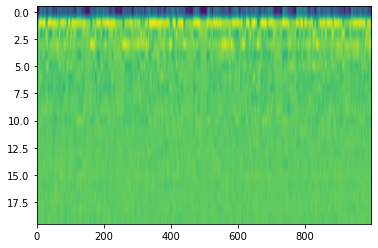

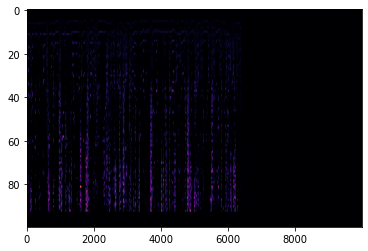

In [243]:
# MFCC Feature Extraction
if not os.path.isfile('mfccs_all_sampless.npy'):

    mfcc_list = []

    # Extract MFCC feature from each audio file and save to a list
    for audio_path in audio_wav:
        mfcc_list.append(wav2mfcc(audio_path, 1000))
        print(audio_path)


    plt.imshow(mfcc_list[0], aspect='auto', cmap=cm.viridis)
    plt.show()

    # Save list to file so feature extraction isn't needed on same dataset
    mfccs = np.asarray(mfcc_list)
    np.save('mfccs_all_sampless.npy', mfccs)

else:
    mfccs_loaded = np.load('mfccs_all_sampless.npy')
    print(mfccs_loaded[0])

    plt.imshow(mfccs_loaded[0], aspect='auto', cmap=cm.viridis)
    plt.show()

# Pitch Contour Extraction
if not os.path.isfile('pitch_all_sampless.npy'):

    pitch_list = []

    # Extract Pitch feature from each audio file and save to a list

    for audio_path in audio_wav:
        pitch_list.append(wav2pitch(audio_path, 100, 10000))
        print(audio_path)


    plt.imshow(pitch_list[0], aspect='auto', cmap=cm.inferno)
    plt.show()

    # Save list to file so feature extraction isn't needed on same dataset
    pitch_list = np.asarray(pitch_list)
    np.save('pitch_all_sampless.npy', pitch_list)

else:
    pitch_loaded = np.load('pitch_all_sampless.npy')
    print(len(pitch_loaded[0][0]))

    plt.imshow(pitch_loaded[0], aspect='auto', cmap=cm.inferno)
    plt.title('Pitch')
    plt.ylim([0,100])


# Results